In [42]:
import pandas as pd
df = pd.read_csv('autism_screening.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [43]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [44]:
df = df.drop(['contry_of_res','used_app_before','relation','age_desc','ethnicity'],axis=1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,2.0,NO


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   704 non-null    int64  
 1   A2_Score   704 non-null    int64  
 2   A3_Score   704 non-null    int64  
 3   A4_Score   704 non-null    int64  
 4   A5_Score   704 non-null    int64  
 5   A6_Score   704 non-null    int64  
 6   A7_Score   704 non-null    int64  
 7   A8_Score   704 non-null    int64  
 8   A9_Score   704 non-null    int64  
 9   A10_Score  704 non-null    int64  
 10  age        702 non-null    float64
 11  gender     704 non-null    object 
 12  jundice    704 non-null    object 
 13  austim     704 non-null    object 
 14  result     704 non-null    float64
 15  Class/ASD  704 non-null    object 
dtypes: float64(2), int64(10), object(4)
memory usage: 88.1+ KB


In [46]:
import numpy as np
df.replace('?', np.nan, inplace=True)
print(df.isna().sum())

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          2
gender       0
jundice      0
austim       0
result       0
Class/ASD    0
dtype: int64


In [47]:
df.fillna(df['age'].median(), inplace=True)

In [48]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,no,no,2.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,no,no,7.0,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,no,no,3.0,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,no,no,7.0,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,no,no,6.0,NO


In [49]:
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,0,0,6.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,0,1,5.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,1,1,8.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,0,1,6.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,0,0,2.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,f,0,0,7.0,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,m,0,0,3.0,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,f,0,0,7.0,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,m,0,0,6.0,NO


In [50]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Map categorical values to 0 and 1
df["gender"] = df["gender"].map({"f": 0, "m": 1})
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})

X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"].map({"YES": 1, "NO": 0})  # Convert to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

result       0.471807
A9_Score     0.111074
A6_Score     0.099235
A5_Score     0.082404
A4_Score     0.052913
A3_Score     0.048212
A7_Score     0.028613
A2_Score     0.021735
A1_Score     0.021675
A10_Score    0.021653
age          0.020836
A8_Score     0.015347
gender       0.004497
jundice      0.000000
austim       0.000000
dtype: float64


In [51]:
df.drop(['result','gender','jundice','austim'], axis=1, inplace=True)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"].map({"YES": 1, "NO": 0})  # Convert to binary

In [52]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,NO
701,1,0,1,1,1,0,1,1,0,1,24.0,YES
702,1,0,0,1,1,0,1,0,1,1,35.0,NO


In [53]:
y

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Data
df["Class/ASD"] = df["Class/ASD"].map({"NO": 0, "YES": 1})  # Convert target to 0/1

# Split into Features & Target
X = df.drop(columns=["Class/ASD"])  
y = df["Class/ASD"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141

Random Forest Accuracy: 0.9645
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       103
           1       0.92      0.95      0.94        38

    accuracy                           0.96       141
   macro avg       0.95      0.96      0.96       141
weighted avg       0.96      0.96      0.96       141

XGBoost Accuracy: 0.9574
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.94      0.89      0.92        38

    accuracy                           0.96       141
   macro avg       0.95      0.94  

c:\Users\khushi shetty\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
df["Class/ASD"].value_counts()


Class/ASD
0    515
1    189
Name: count, dtype: int64

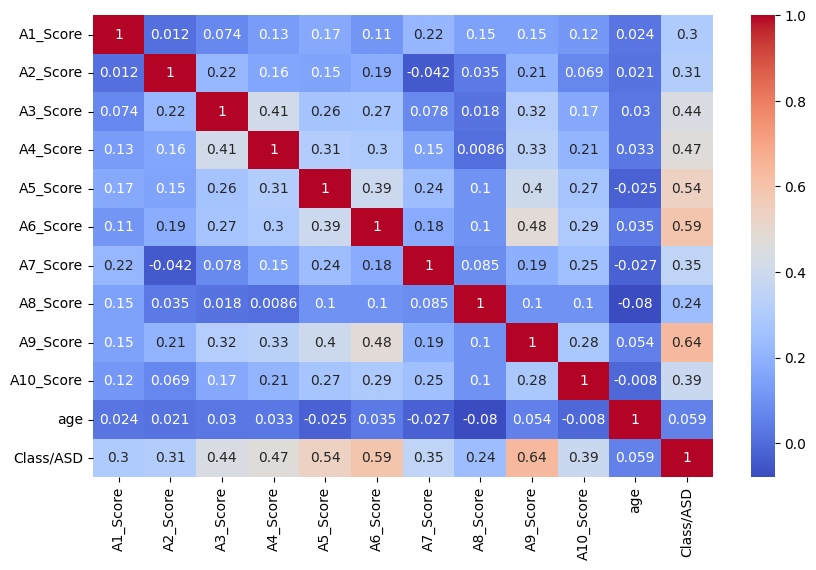

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.9630699088145895


In [57]:
import pandas as pd
df = pd.read_csv('autism_screening.csv')

df = df.drop(['contry_of_res','used_app_before','relation','age_desc','ethnicity'],axis=1)

import numpy as np
df.replace('?', np.nan, inplace=True)
df.fillna(df['age'].median(), inplace=True)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Map categorical values to 0 and 1
df["gender"] = df["gender"].map({"f": 0, "m": 1})
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})

df.drop(['result','gender','jundice','austim'], axis=1, inplace=True)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"].map({"YES": 1, "NO": 0})  # Convert to binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


Accuracy: 1.0000


In [58]:
X

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age
0,1,1,1,1,0,0,1,1,0,0,26.0
1,1,1,0,1,0,0,0,1,0,1,24.0
2,1,1,0,1,1,0,1,1,1,1,27.0
3,1,1,0,1,0,0,1,1,0,1,35.0
4,1,0,0,0,0,0,0,1,0,0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,25.0
700,1,0,0,0,0,0,0,1,0,1,34.0
701,1,0,1,1,1,0,1,1,0,1,24.0
702,1,0,0,1,1,0,1,0,1,1,35.0


In [59]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv('autism_screening.csv')

# Drop unnecessary columns
df = df.drop(['contry_of_res', 'used_app_before', 'relation', 'age_desc', 'ethnicity'], axis=1)

# Replace '?' with NaN and fill missing values
df.replace('?', np.nan, inplace=True)
df.fillna(df['age'].median(), inplace=True)

# Map categorical values
df["gender"] = df["gender"].map({"f": 0, "m": 1})
df["jundice"] = df["jundice"].map({"no": 0, "yes": 1})
df["austim"] = df["austim"].map({"no": 0, "yes": 1})

# Drop unwanted columns
df.drop(['result', 'gender', 'jundice', 'austim'], axis=1, inplace=True)

# Define Features (X) and Target (y)
X = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"].map({"YES": 1, "NO": 0})  # Convert to binary

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save Model
joblib.dump(model, 'autism_model.pkl')

print("Model saved successfully!")


Model saved successfully!
